In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

# Read data

In [2]:
data = pd.read_csv('corn.csv')

## Columns (fields)

In [3]:
data.columns

Index(['year', 'month', 'open', 'close', 'open_net', 'close_net', 'open_rel',
       'close_rel', 'volume', 'openint', 'day', 'date'],
      dtype='object')

## Contract information

In [4]:
_m = data['month'].unique()
_y = data['year'].drop_duplicates().sort_values()
print("{} years from {} to {}".format(len(_y), _y.iloc[0], _y.iloc[-1]))
print("months: {}".format(_m))
_nmonths = len(_m)
_nyears = len(_y)
_contracts = data[['year', 'month']].drop_duplicates()
_ncontracts = len(_contracts)
_npossible = _nmonths * _nyears
print('Num of contracts {} {} possible {}'.format(_ncontracts, '=' if _ncontracts == _npossible else '<', _npossible ))

44 years from 1959 to 2002
months: [12  5  3  7  9 10]
Num of contracts 217 < possible 264


# Support code

In [5]:
# plots important data for a single contract (year & month)
def contractPlots(df, year, month):
    print("Contract plots for {}/{}".format(year, month))
    row = df[(df['year'] == year) & (df['month'] == month)]

    plt.rcParams["figure.figsize"]=20,15
    plt.subplot(4, 1, 1)
    plt.plot(row['day'], row['close_net'], 'r-', label="close")
    plt.plot(row['day'], row['open_net'], 'b-', label='open')
    plt.grid(b=True, which='major')
    plt.ylabel('Net')
    plt.title('Price')
    plt.legend()
    
    plt.subplot(4, 1, 2)
    plt.plot(row['day'], row['close_rel'], 'r-', label="close")
    plt.plot(row['day'], row['open_rel'], 'b-', label='open')
    plt.grid(b=True, which='major')
    plt.ylabel('Relative')
    plt.title('Price')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(row['day'], row['volume'], 'b-')
    plt.grid(b=True, which='major')
    plt.ylabel('Contracts')
    plt.title('Volume')

    plt.subplot(4, 1, 4)
    plt.plot(row['day'], row['openint'], 'b-')
    plt.grid(b=True, which='major')
    plt.ylabel('Contracts')
    plt.title('Open Interest')
    plt.show()
    
def yearPlots(df, year):
    yeardata = df[df['year'] == year]
    months = yeardata['month'].unique()
    for month in months:
        contractPlots(data, 1999, month)

In [6]:
def allYears(col, month):
    _df = data[data['month'] == month]
    years = pd.unique(_df['year'])
    for year in years:
        _df2 = _df[_df['year']==year]
        plt.plot(_df2['day'], _df2[col])

In [7]:
def overallStats(dfin, month, days=200):
    meanlist = []
    rellist = []
    varlist = []
    vollist = []
    openintlist = []
    days = range(days)

    df = dfin[dfin['month']==month]
    for i in days:
        meanlist.append(df[df['day']==i]['close_net'].mean())
        rellist.append(df[df['day']==i]['close_rel'].mean())
        varlist.append(df[df['day']==i]['close_net'].var())
        vollist.append(df[df['day']==i]['volume'].mean())
        openintlist.append(df[df['day']==i]['openint'].mean())

    #plt.rcParams["figure.figsize"]=20,25

    plt.subplot(5, 1, 1)
    plt.plot(days, meanlist, 'g-')
    plt.grid(b=True, which='major')
    plt.title('Close - Mean')
    plt.ylabel('Net')

    plt.subplot(5, 1, 2)
    plt.plot(days, varlist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Net Close - Var')
    plt.ylabel('Variance')

    plt.subplot(5, 1, 3)
    plt.plot(days, rellist, 'g-')
    plt.grid(b=True, which='major')
    plt.title('Relative Close - Mean')
    plt.ylabel('Relative')

    plt.subplot(5, 1, 4)
    plt.plot(days, vollist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Volume')
    plt.ylabel('Contracts')

    plt.subplot(5, 1, 5)
    plt.plot(days, openintlist, 'b-')
    plt.grid(b=True, which='major')
    plt.title('Openint')
    plt.ylabel('Contracts')

## Contract plots one contract

Contract plots for 1999/12


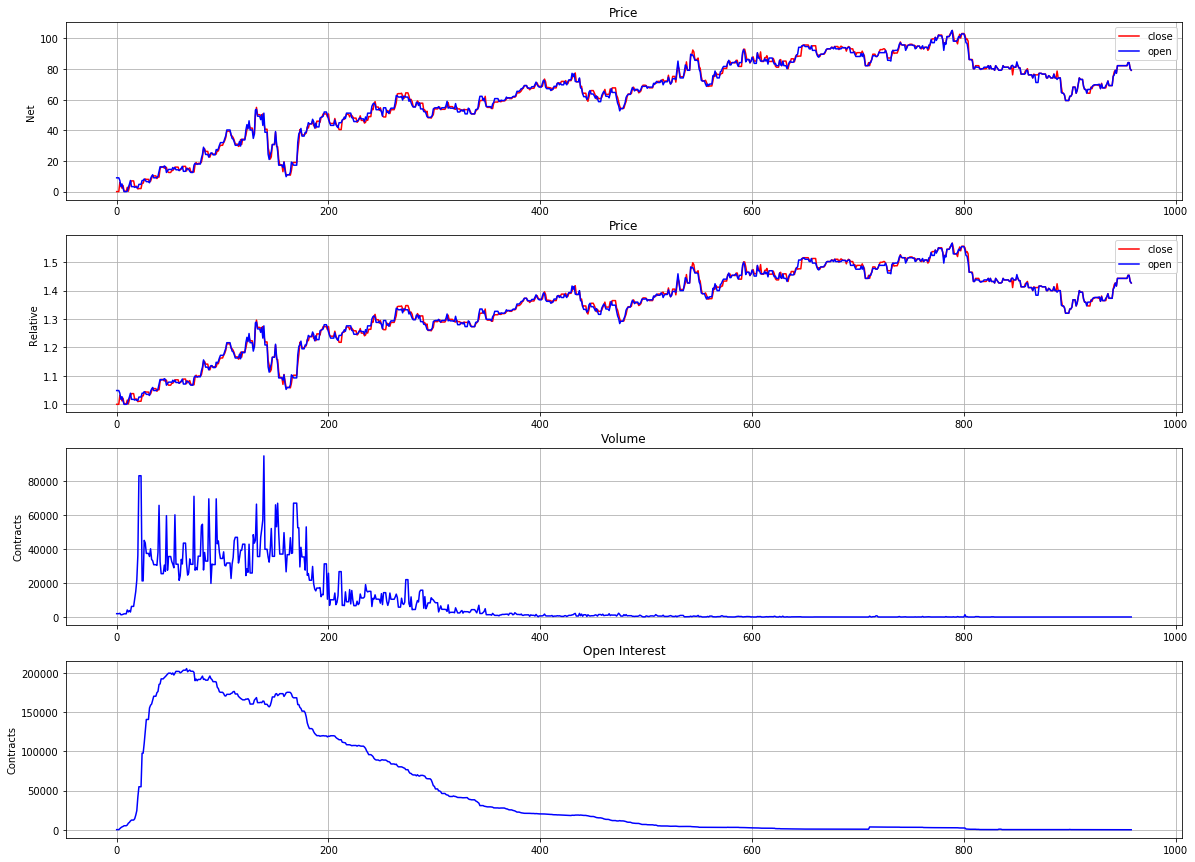

In [8]:
year = 1999
month = 12
contractPlots(data, year, month)

# Contract plots for a year

Contract plots for 1999/3


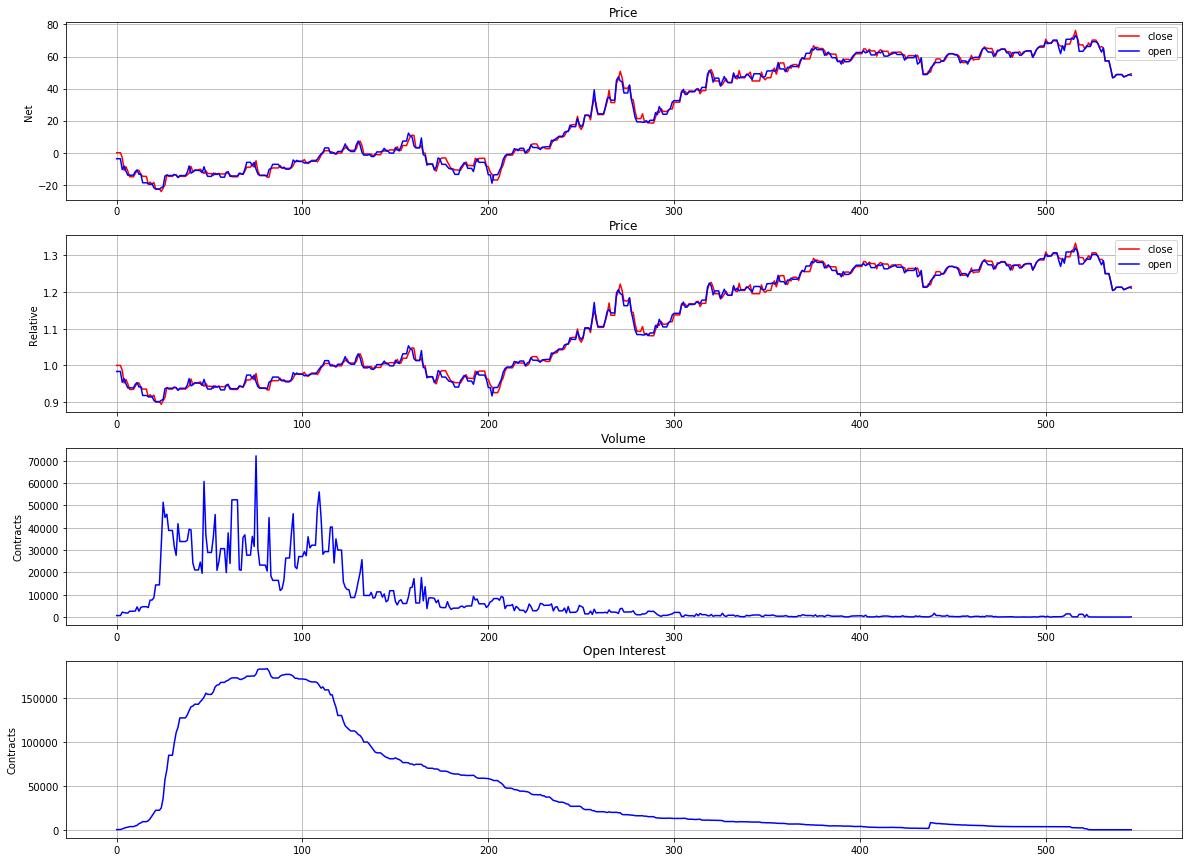

Contract plots for 1999/12


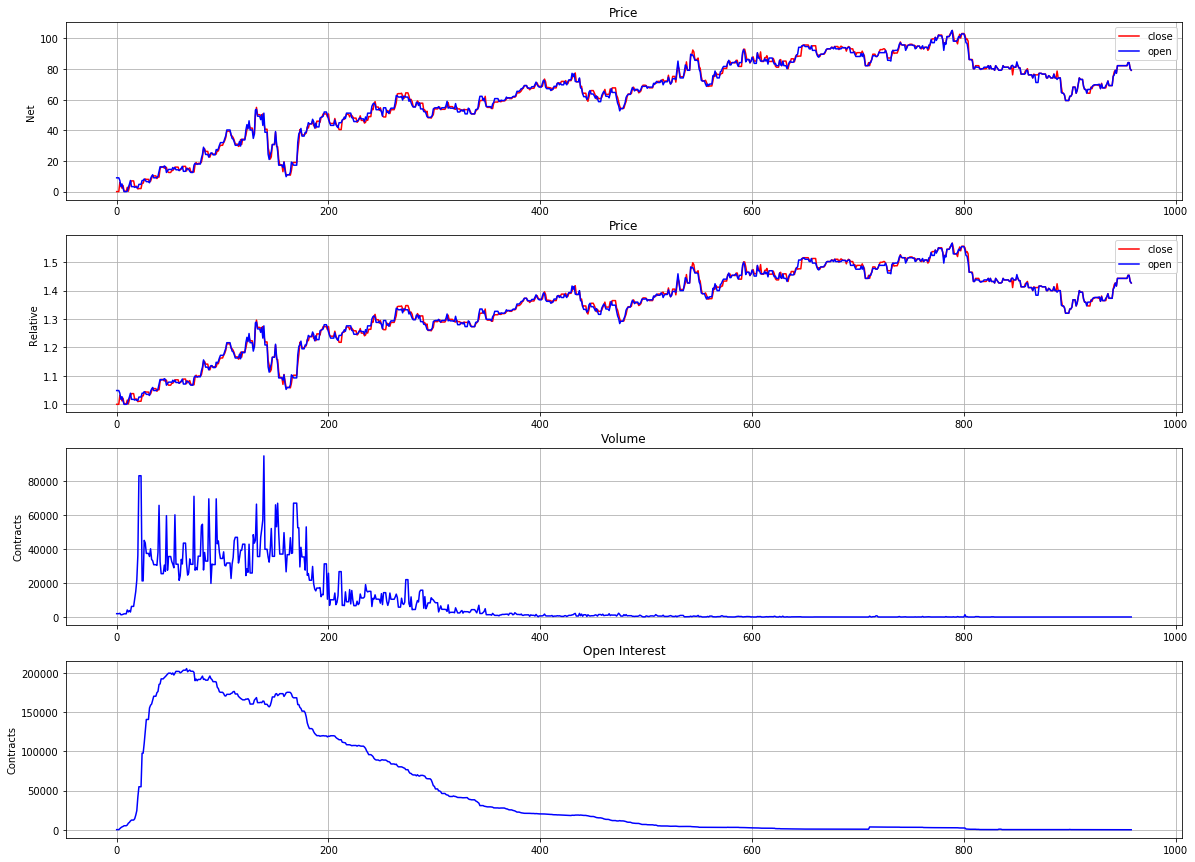

Contract plots for 1999/9


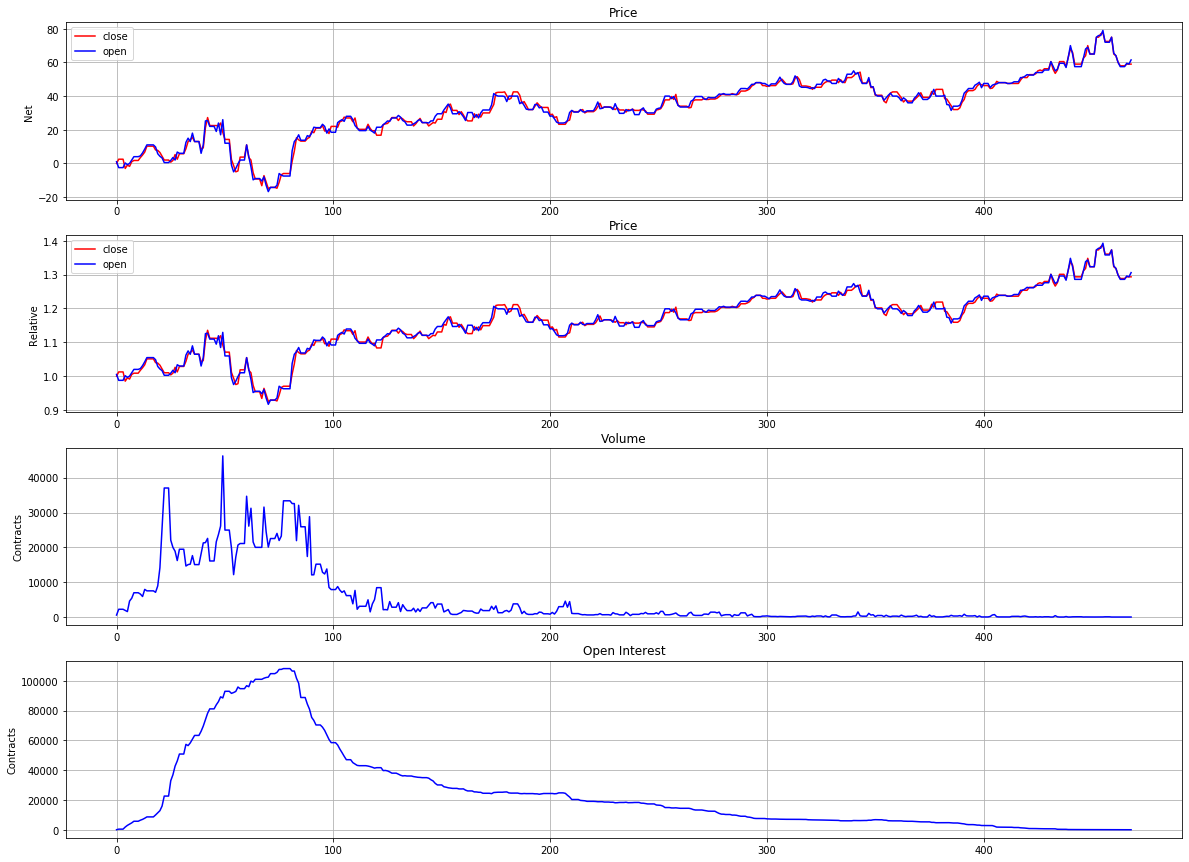

Contract plots for 1999/7


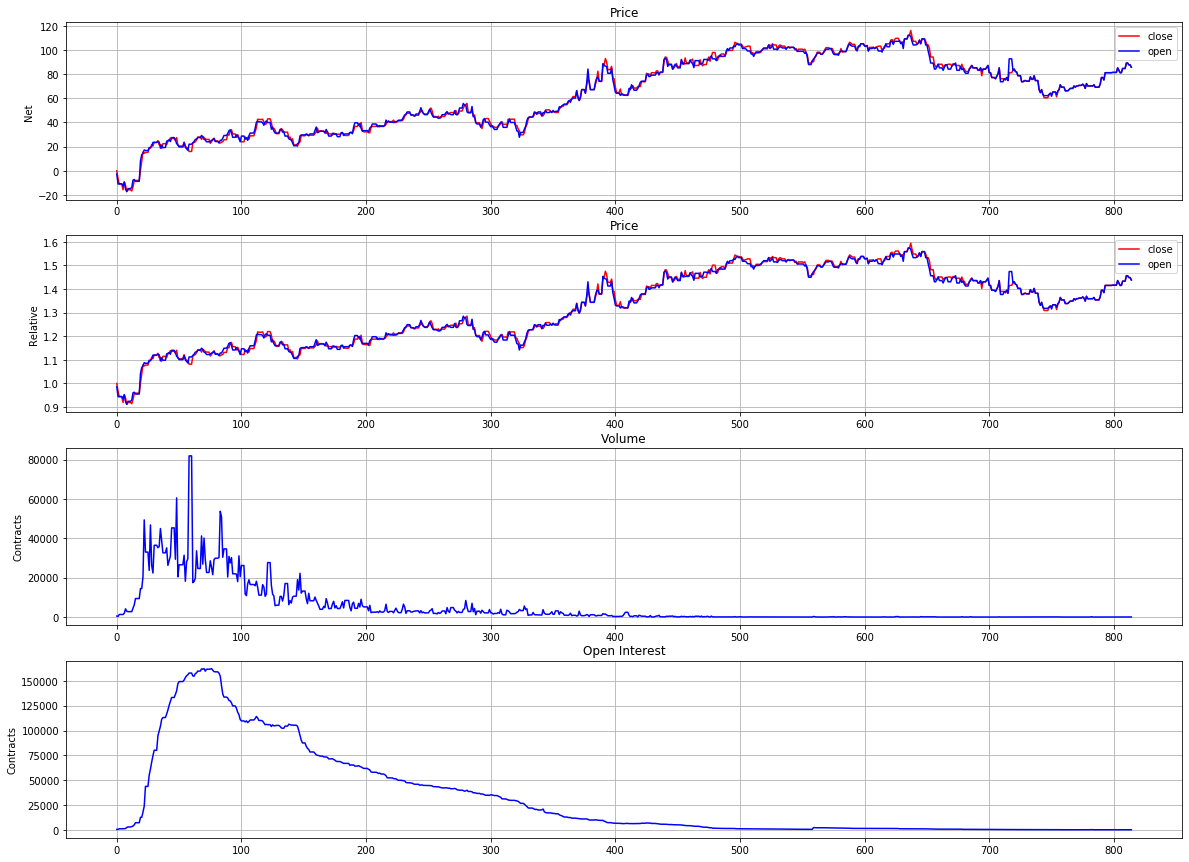

Contract plots for 1999/5


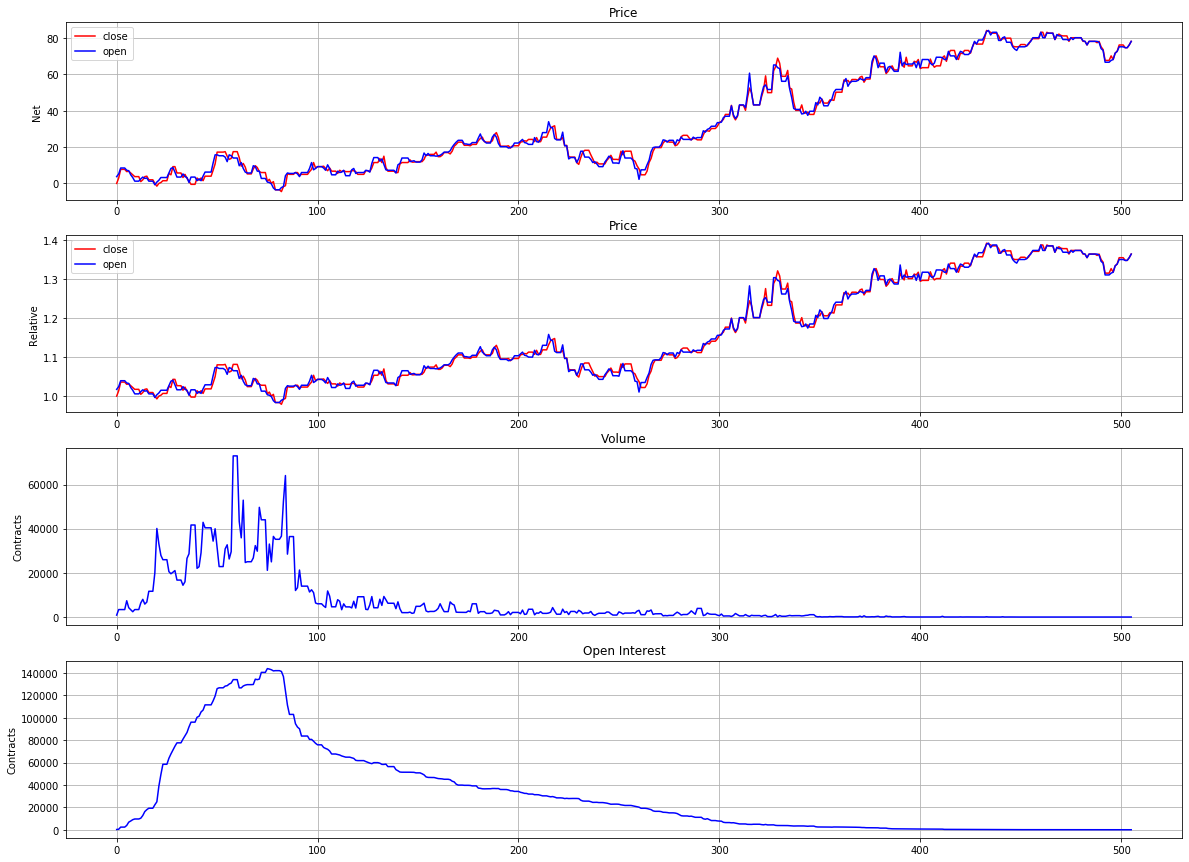

In [9]:
yearPlots(data, 1999)

## All years: Net close

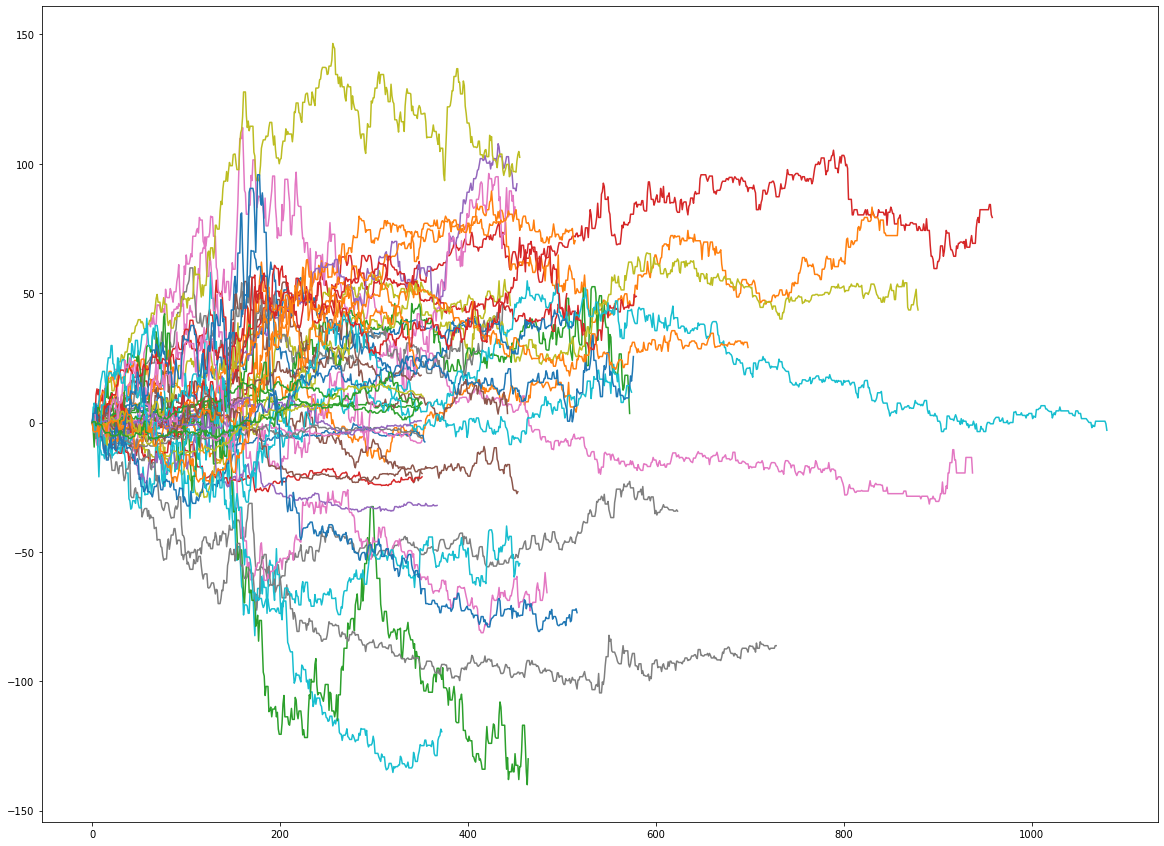

In [10]:
month = 12
allYears('close_net', month)

## All years: Relative close

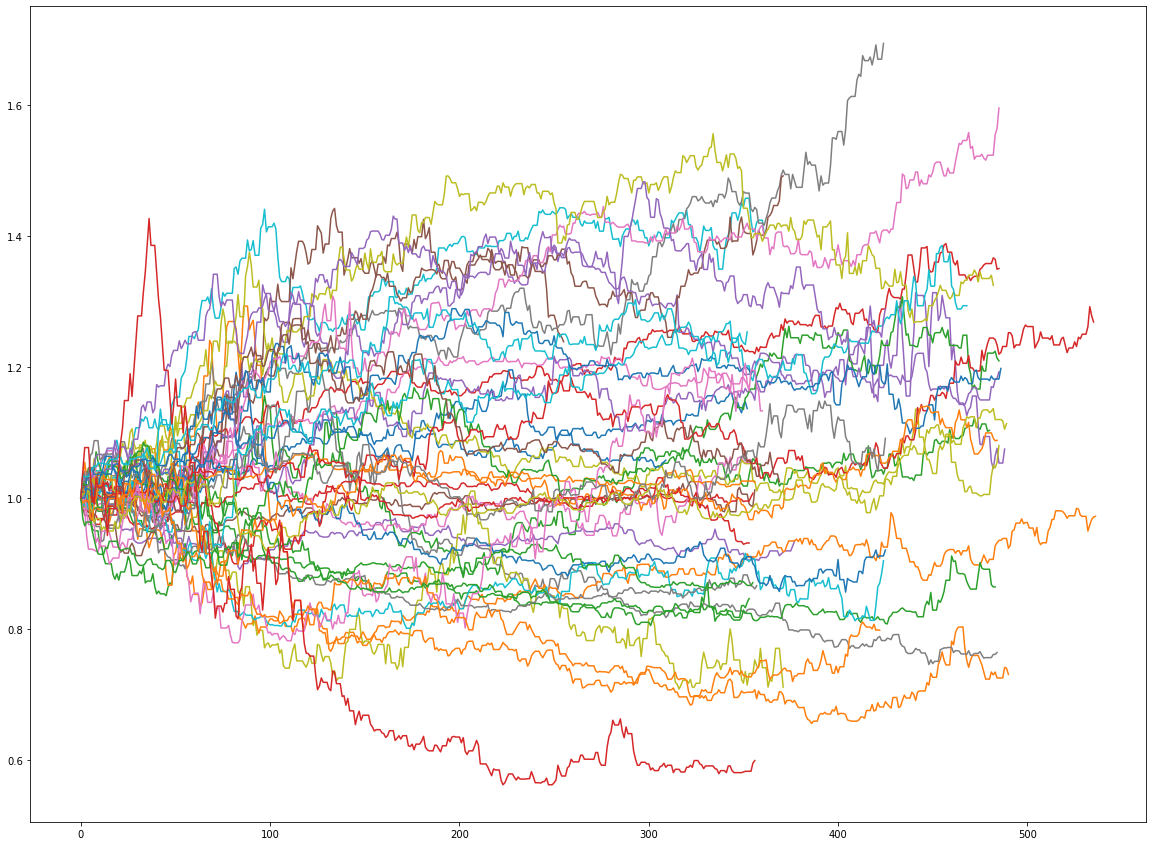

In [11]:
month = 9
allYears('close_rel', month)

# Overall statistics
The plots below show the aggregate (mean or variance) of all years by day. For example, at 200 on the x-axis, we see the average of all net close prices 200 days before the contract end.

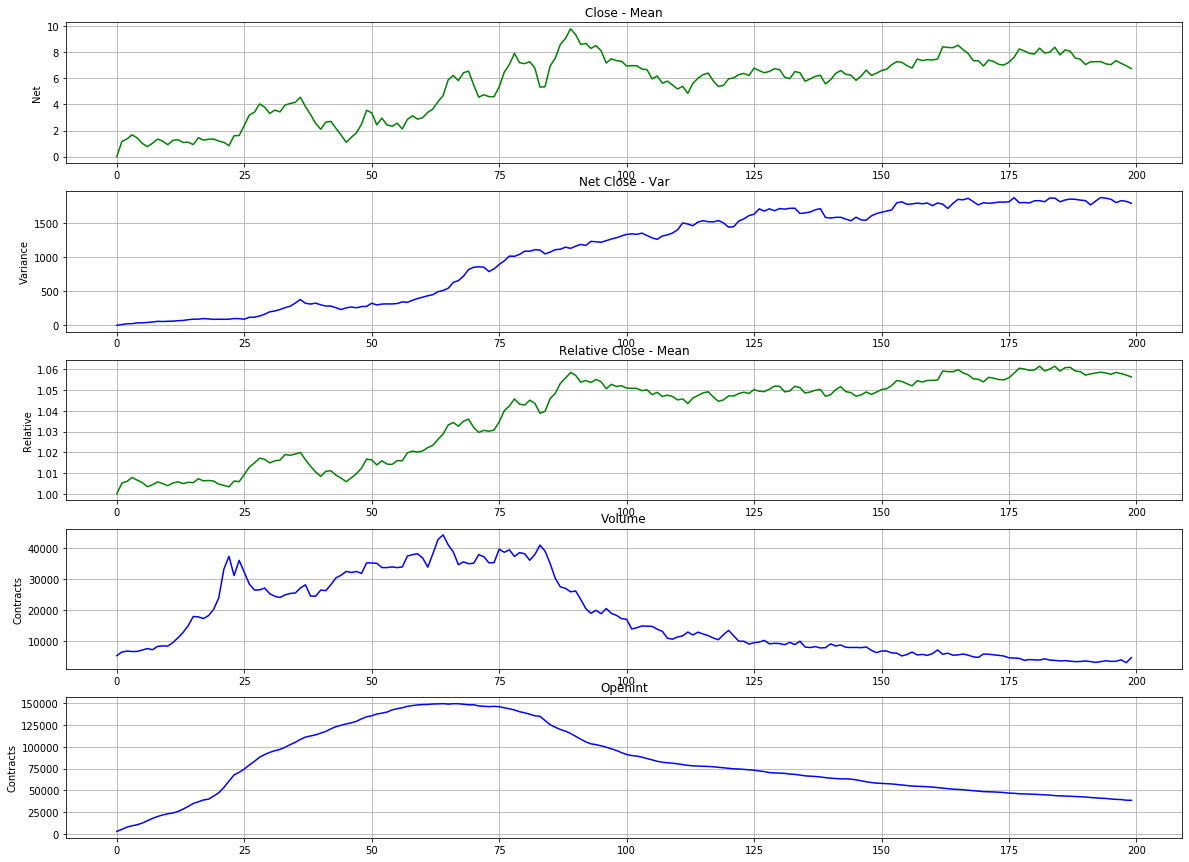

In [12]:
overallStats(data, 9)

# Granger causality
The Null hypothesis for grangercausalitytests is that the time series in the second column, x2, does NOT Granger cause the time series in the first column, x1. Grange causality means that past values of x2 have a statistically significant effect on the current value of x1, taking past values of x1 into account as regressors. We reject the null hypothesis that x2 does not Granger cause x1 if the pvalues are below a desired size of the test.

The null hypothesis for all four test is that the coefficients corresponding to past values of the second time series are zero.

‘params_ftest’, ‘ssr_ftest’ are based on F distribution

‘ssr_chi2test’, ‘lrtest’ are based on chi-square distribution

In [13]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html
from statsmodels.tsa.stattools import grangercausalitytests

In [18]:
data

,year,month,open,close,open_net,close_net,open_rel,close_rel,volume,openint,day,date
0,1971,12,119.500,118.625,0.875,0.000,1.007376,1.000000,4920,2915,0,1971-12-20
1,1971,12,119.500,118.625,0.875,0.000,1.007376,1.000000,4920,2915,1,1971-12-20
2,1971,12,119.500,118.625,0.875,0.000,1.007376,1.000000,4920,2915,2,1971-12-20
3,1971,12,117.875,118.875,-0.750,0.250,0.993678,1.002107,1925,3355,3,1971-12-17
4,1971,12,118.750,117.875,0.125,-0.750,1.001054,0.993678,3455,5285,4,1971-12-16
...,...,...,...,...,...,...,...,...,...,...,...,...
99428,1972,7,139.375,139.500,15.500,15.625,1.125126,1.126135,275,975,356,1971-07-30
99429,1972,7,138.875,139.250,15.000,15.375,1.121090,1.124117,190,930,357,1971-07-29
99430,1972,7,138.750,139.125,14.875,15.250,1.120081,1.123108,1070,805,358,1971-07-28
99431,1972,7,144.875,140.750,21.000,16.875,1.169526,1.136226,390,520,359,1971-07-27


In [34]:
d02 = data[data['year']==2002].copy()
#d02['date'] = pd.to_datetime(d02['date'])
d02['date_'] = pd.to_datetime(d02['date'])
d02 = d02.drop(columns=(['year', 'close', 'open_net', 'close_net', 'open_rel', 'close_rel', 'volume', 'day', 'date', 'openint']))
d02 = d02.rename(columns={'date_': 'date'})
d02['month'].unique()

array([ 9, 10,  3,  5,  7])

In [61]:
mar02 = d02[d02['month']==3].drop(columns='month').rename(columns={'open': 'mar'})
may02 = d02[d02['month']==5].drop(columns='month').rename(columns={'open': 'may'})
jul02 = d02[d02['month']==7].drop(columns='month').rename(columns={'open': 'july'})
sep02 = d02[d02['month']==9].drop(columns='month').rename(columns={'open': 'sep'})

In [83]:
left = mar02.copy()
right = sep02.copy()
_df = right.merge(left).drop(columns='date')
r = grangercausalitytests(_df, [180])


Granger Causality
number of lags (no zero) 180
ssr based F test:         F=1.6431  , p=0.0006  , df_denom=171, df_num=180
ssr based chi2 test:   chi2=920.1175, p=0.0000  , df=180
likelihood ratio test: chi2=534.1996, p=0.0000  , df=180
parameter F test:         F=1.6431  , p=0.0006  , df_denom=171, df_num=180


In [136]:
round(9.899999, 2)

9.9

In [188]:
# results returned from grainer is a dictionary keyed by lag (integer).
# the value at results[lag] is a 2-tuple
# the first item in the tuple is a dict of results of the tests; second item is not understood at this time
# key is test name; results of tests are 3 or 4 tuple. The second result ([1]) is the p-value
# example of this dict is below.
# {'ssr_ftest': (1.5328912836909083, 0.030747206701970127, 57.0, 180),
#  'ssr_chi2test': (2023.4164944719992, 7.81383224635291e-309, 180),
#  'lrtest': (737.7082395975993, 1.4470880239491697e-68, 180),
#  'params_ftest': (1.5328912836904054, 0.03074720670206777, 57.0, 180.0)}

def checkGC(left, right, lags, verbose=False):
    left = left.copy()
    right = right.copy()
    df = left.merge(right).drop(columns='date')
    try:
        r = grangercausalitytests(df, lags, verbose=verbose)
    except ValueError:
        return {}
    results = {}
    for key in r.keys():
        results[key] = {}
        for test, vals in r[key][0].items():
            results[key][test] = vals[1]
    return results

In [158]:
_g = dict(a=1, b=2)
for x, v in _g:
    print(x, v)

ValueError: not enough values to unpack (expected 2, got 1)

In [204]:
years = range(1995, 2003)
lags = [180, 120, 60]
verbose = False
tests = ['ssr_ftest', 'ssr_chi2test', 'lrtest', 'params_ftest']

print('YEAR MON  LAG {:>12s} {:>12s} {:>12s} {:>12s} {:>12s}'.format(*tests, 'max'))
for year in years:
    _df = data[data['year']==year].copy()
    _df['date_'] = pd.to_datetime(_df['date'])
    columns=['year', 'close', 'open_net', 'close_net', 'open_rel', 'close_rel', 'volume', 'day', 'date', 'openint']
    _df = _df.drop(columns=columns)
    _df = _df.rename(columns={'date_': 'date'})
    series = dict(
        mar = _df[_df['month']==3].drop(columns='month').rename(columns={'open': 'mar'}),
        may = _df[_df['month']==5].drop(columns='month').rename(columns={'open': 'may'}),
        jul = _df[_df['month']==7].drop(columns='month').rename(columns={'open': 'jul'}),
        sep = _df[(_df['month']==9)|(_df['month']==10)].drop(columns='month').rename(columns={'open': 'sep'}),
    )

    for n, mon in enumerate(['mar', 'may', 'jul']):
        # check pairwise granger
        l = [1, lags[n]]
        r = checkGC(series['sep'], series[mon], l)
        for lag, val in r.items():
            pvalues = [val[test] for test in tests]
            print("{:4d} {} {:4d} {:12.8f} {:12.8f} {:12.8f} {:12.8f} {:12.8f}".format(
                year, mon, lag, *pvalues, max(pvalues)))

YEAR MON  LAG    ssr_ftest ssr_chi2test       lrtest params_ftest          max
1995 mar    1   0.00014339   0.00012466   0.00013705   0.00014339   0.00014339
1995 mar  180   0.03074721   0.00000000   0.00000000   0.03074721   0.03074721
1995 may    1   0.00367796   0.00349517   0.00359431   0.00367796   0.00367796
1995 may  120   0.00000004   0.00000000   0.00000000   0.00000004   0.00000004
1995 jul    1   0.04595256   0.04523764   0.04549653   0.04595256   0.04595256
1995 jul   60   0.00000000   0.00000000   0.00000000   0.00000000   0.00000000
1996 mar    1   0.00275298   0.00257506   0.00267397   0.00275298   0.00275298
1996 mar  180   0.72477464   0.00000000   0.00000000   0.72477464   0.72477464
1996 may    1   0.00087353   0.00080933   0.00084824   0.00087353   0.00087353
1996 may  120   0.33059058   0.00000027   0.00018624   0.33059058   0.33059058
1996 jul    1   0.00406483   0.00389896   0.00398816   0.00406483   0.00406483
1996 jul   60   0.00000000   0.00000000   0.00000000

'2001-03-26'